In [44]:
import itertools
import pandas as pd 
import numpy as np
import statsmodels.api as sm
from random import gauss
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from random import random
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing, Holt

import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

import warnings
warnings.simplefilter(action = 'ignore', category= FutureWarning)

# Custom plotting preferences for cleaner visuals
plt.rcParams.update({
    "figure.figsize": (10, 5),           # Consistent figure size
    "lines.linewidth": 1.2,              # Thinner lines (default is ~1.5–2 in fivethirtyeight)
    "axes.grid": True,                   # Keep the grid for readability
    "grid.alpha": 0.3,                   # Soften the grid lines
    "axes.facecolor": "white",           # White background for clarity
    "axes.edgecolor": "gray",            # Softer border
    "axes.labelsize": 12,
    "axes.titlesize": 14,
    "font.size": 11,
    "legend.frameon": False,             # Cleaner legends
    "legend.fontsize": 10,
    "lines.markersize": 4,
})

In [19]:
# general settings
class CFG:
    data_folder = 'data_science/datasets/raw/'
    

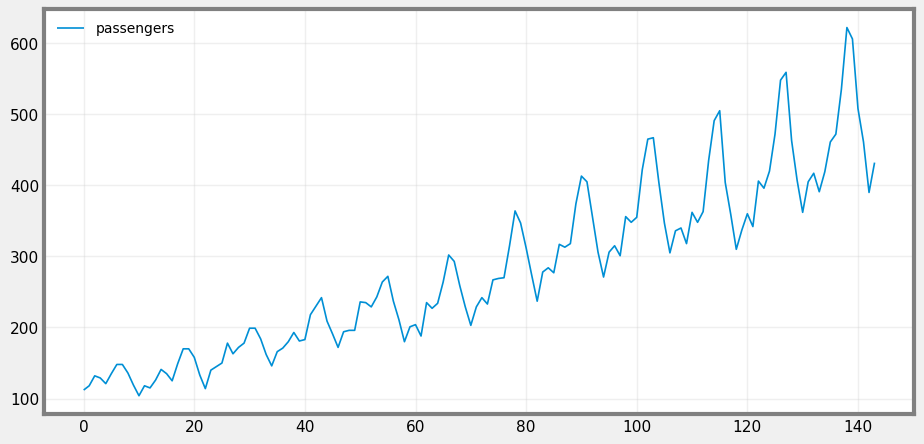

In [45]:
alpha = 0.5
filepath = 'data_science/datasets/raw/passengers.csv'
df= pd.read_csv(filepath, usecols = ['passengers'])
df.plot.line()
plt.show()


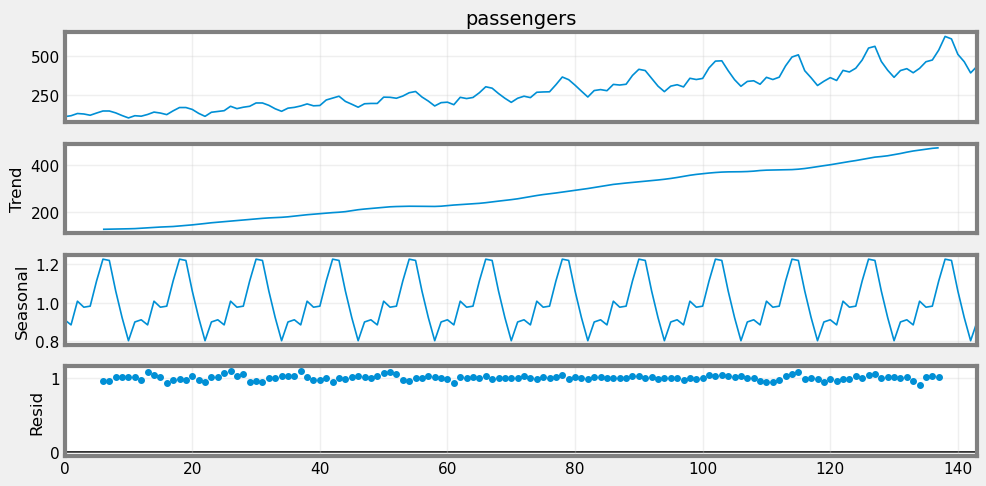

In [47]:
decomposition = sm.tsa.seasonal_decompose(df['passengers'], period=12, model ='multiplicative')
figure = decomposition.plot()
plt.show()


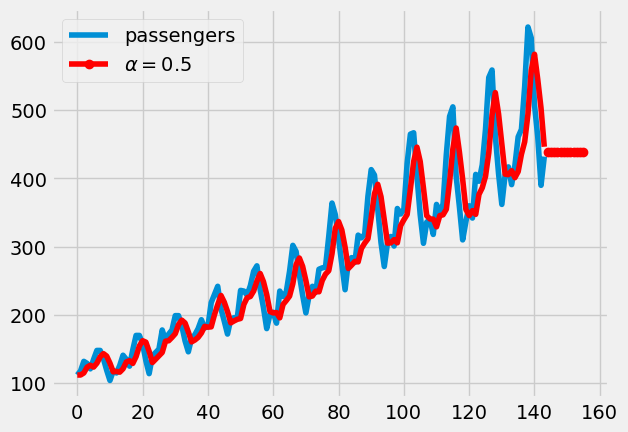

In [20]:
alpha = 0.5
filepath = 'data_science/datasets/raw/passengers.csv'
df= pd.read_csv(filepath, usecols = ['passengers'])
df.plot.line()
fit1 = SimpleExpSmoothing(df).fit(smoothing_level= alpha, optimized=False)
fcast1 = fit1.forecast(12).rename(r'$\alpha=0.5$')
fcast1.plot(marker='o', color='red', legend=True)
fit1.fittedvalues.plot(color='red')
plt.show()


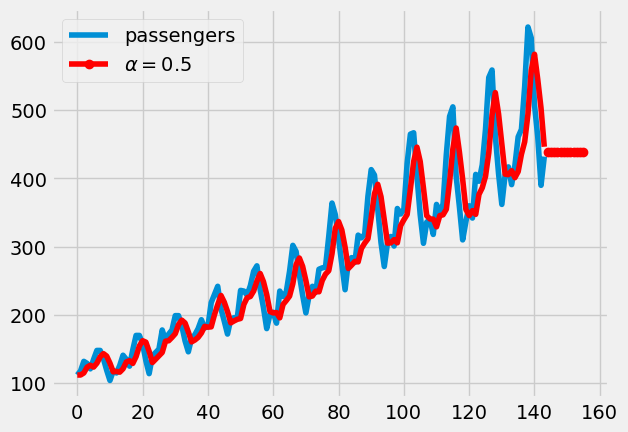

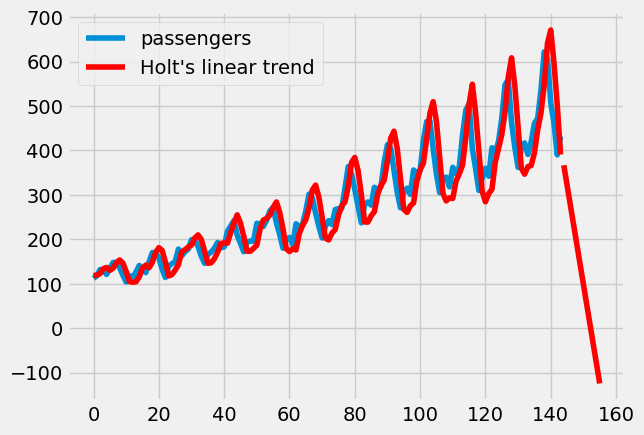

In [22]:
alpha = 0.5
df = pd.read_csv(CFG.data_folder + 'passengers.csv', usecols = ['passengers'])
df.plot.line()
fit1 = SimpleExpSmoothing(df).fit(smoothing_level = alpha, optimized=False)
fcast1 = fit1.forecast(12).rename(r'$\alpha=0.5$')
fcast1.plot(marker='o', color='red', legend=True)
fit1.fittedvalues.plot(color='red')
plt.show()

df.plot.line()

fit1 =Holt(df).fit(smoothing_level=0.5, smoothing_slope=0.5, optimized=False)
fcast1 = fit1.forecast(12).rename("Holt's linear trend")
fit1.fittedvalues.plot(color='red')
fcast1.plot(color='red', legend=True)

plt.show()

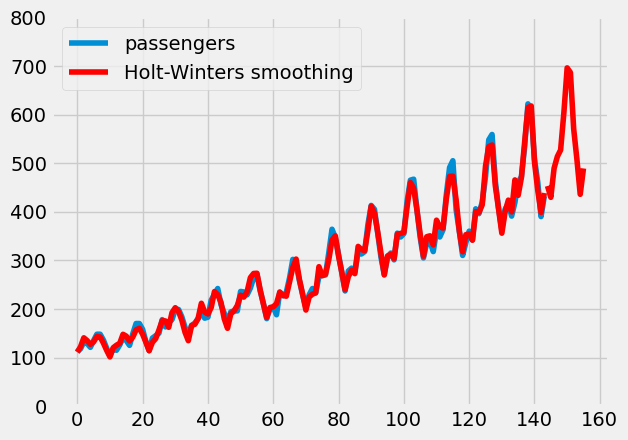

In [34]:
alpha = 0.5
df = pd.read_csv(CFG.data_folder + 'passengers.csv', usecols = ['passengers'])
df.plot.line()
fit1 = ExponentialSmoothing(df, seasonal_periods=12, trend='add', seasonal='add')
fit1 = fit1.fit(smoothing_level=0.5)
fit1.fittedvalues.plot(color='red')
fit1.forecast(12).rename("Holt-Winters smoothing").plot(color='red', legend=True)

plt.ylim(0,800); plt.show()

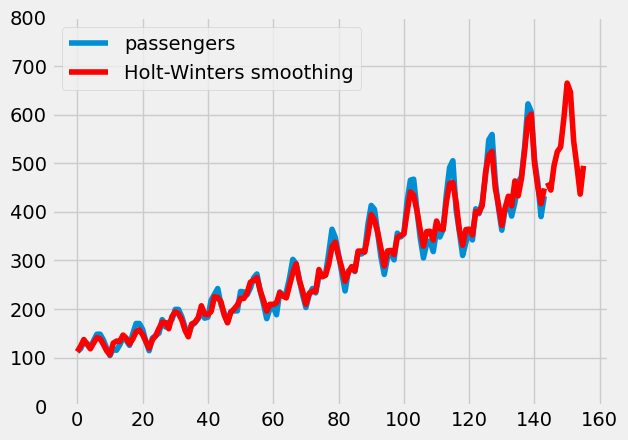

In [35]:
alpha = 0.5
df = pd.read_csv(CFG.data_folder + 'passengers.csv', usecols = ['passengers'])
df.plot.line()
fit1 = ExponentialSmoothing(df, seasonal_periods=12, trend='mul', seasonal='add')
fit1 = fit1.fit(smoothing_level=0.5)
fit1.fittedvalues.plot(color='red')
fit1.forecast(12).rename("Holt-Winters smoothing").plot(color='red', legend=True)

plt.ylim(0,800); plt.show()

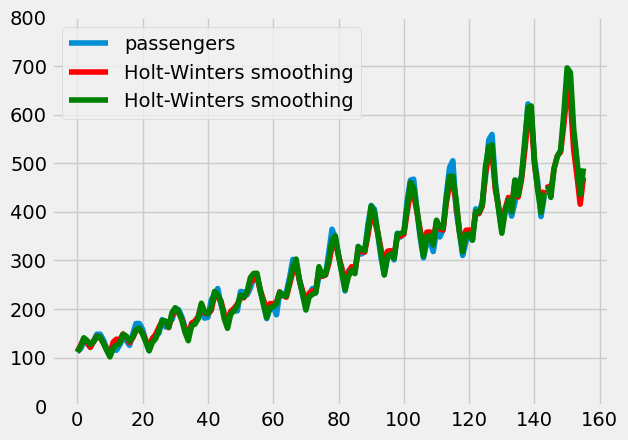

In [42]:
alpha = 0.5
df = pd.read_csv(CFG.data_folder + 'passengers.csv', usecols = ['passengers'])
df.plot.line()
fit1 = ExponentialSmoothing(df, seasonal_periods=12, trend='add', seasonal='add')
fit1 = fit1.fit(smoothing_level=0.5)
fit1.fittedvalues.plot(color='red')
fit1.forecast(12).rename("Holt-Winters smoothing").plot(color='red', legend=True)

fit2 = ExponentialSmoothing(df, seasonal_periods=12, trend='mul', seasonal='mul')
fit2 = fit2.fit(smoothing_level=0.5)
fit2.fittedvalues.plot(color='green')
fit2.forecast(12).rename("Holt-Winters smoothing").plot(color='green', legend=True)

plt.ylim(0,800); plt.show()